In [1]:
import keras 
print(keras.__version__)

2.9.0


###이진분류문제

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

In [3]:
train_data.shape

(25000,)

In [4]:
train_labels[0] #리뷰가 긍정적이면 1 

1

In [5]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [6]:
word_index = imdb.get_word_index() #key, value를 가진 딕셔너리, 각 단어의 라벨(숫자)값이 딕셔너리로 저장. 
reverse_word_index = dict([value,key] for (key, value) in word_index.items()) 

In [7]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]]) #해당 숫자에 해당하는 단어가 있는가. i-3은 0,1,2가 기호이기 때문에 제외. 
# 0-2까지 들어왔을 때 음수값이 나오므로 컴퓨터는 그것을 없다고 인식한다. 
# 다른 값이 들어가서 0-2값으로 변하는 것은 괜찮음.  

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
type(reverse_word_index)

dict

###데이터를 준비

In [17]:
# 데이터를 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

# Data의 Encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


float타입으로 변환 

In [21]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 신경망의 구축


In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 120ms/step - loss: 0.5213 - accuracy: 0.7912 - val_loss: 0.3907 - val_accuracy: 0.8726
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3144 - accuracy: 0.9013 - val_loss: 0.3270 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2252 - accuracy: 0.9275 - val_loss: 0.2804 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1785 - accuracy: 0.9400 - val_loss: 0.2702 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1416 - accuracy: 0.9559 - val_loss: 0.3262 - val_accuracy: 0.8725
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1190 - accuracy: 0.9615 - val_loss: 0.2893 - val_accuracy: 0.8836
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0956 - accuracy: 0.9721 - val_loss: 0.3121 - val_accuracy: 0.8830
Epoch 8/20
3

In [27]:
# 실험 결과 데이터를 가져온다. 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

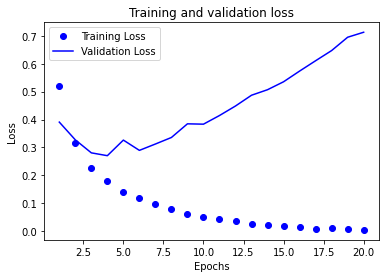

In [28]:
# 실험 결과를 시각화 한다. 
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss,'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

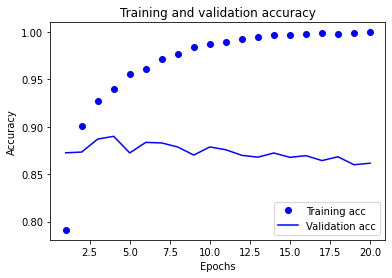

In [29]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/3
59/59 [==============================] - 2s 26ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.7608 - val_accuracy: 0.8635
Epoch 2/3
59/59 [==============================] - 1s 20ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.8146 - val_accuracy: 0.8615
Epoch 3/3
59/59 [==============================] - 1s 19ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.9090 - val_accuracy: 0.8582


In [23]:
for c in (['A','B','C']) :
  print(c)

for i, c in enumerate (['A','B','C'], start=1):
  print(i, c)

A
B
C
1 A
2 B
3 C


In [32]:
temp = enumerate(['A','B','C'])
# list(temp) 
next(temp)
next(temp)
next(temp)

(2, 'C')